In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import dask.dataframe as dd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sns.set_style('white')
plt.rcParams['figure.figsize'] = 12,8

In [2]:
def load_data():
    # 3261930 rows
    # Using dask for multithread support
    df = dd.read_csv("data/english.csv", dtype='object')
    df["tweet_time"] = dd.to_datetime(df["tweet_time"], format="%Y-%m-%d %H:%M")
    return df
   

In [3]:
df = load_data()

In [4]:
# Just check what is actually usable here and what we need to drop
(df.isnull().sum(axis=0).compute() / len(df)).sort_values(ascending=False)

longitude                   0.999961
latitude                    0.999961
poll_choices                0.999881
in_reply_to_tweetid         0.978771
in_reply_to_userid          0.968538
quoted_tweet_tweetid        0.959257
user_profile_url            0.818248
retweet_tweetid             0.667797
retweet_userid              0.667797
user_mentions               0.596244
urls                        0.136965
user_profile_description    0.109622
user_reported_location      0.097539
hashtags                    0.089934
quote_count                 0.000708
reply_count                 0.000708
like_count                  0.000708
retweet_count               0.000708
tweet_client_name           0.000069
userid                      0.000000
follower_count              0.000000
user_display_name           0.000000
user_screen_name            0.000000
tweet_time                  0.000000
following_count             0.000000
account_creation_date       0.000000
account_language            0.000000
t

<BarContainer object of 3110 artists>

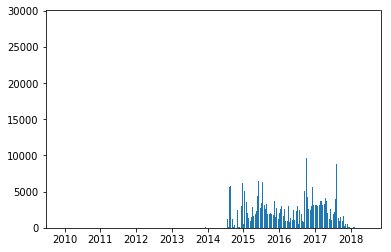

In [28]:
# Resample by daily usage and plot the histogram
daily_usage = df[['tweet_time', 'userid']].set_index('tweet_time').resample('D').count().compute()
plt.bar(daily_usage.index, daily_usage.userid);

<BarContainer object of 35 artists>

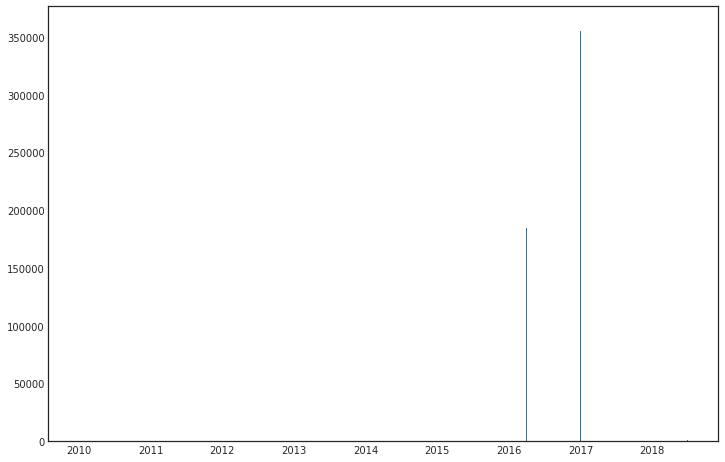

In [34]:
quaterly = daily_usage[daily_usage > dt.date(2016,1,1)].resample('Q').sum()
plt.bar(quaterly.index, quaterly.userid)